# Математика для Data Science.
# Домашнее задание №1.

Загрузим датасет о ценах на дома в Бостоне. 

In [106]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


boston = load_boston()
print(boston.data.shape)

(506, 13)


In [107]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [108]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [109]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [110]:
np.dot(x1, x2)

234704.86490859918

этап 2: взять два атрибута и посчитать скалярное произведение двух векторов (2 дома), начертить 2 дома как вектора в двухмерном пространстве, и сравниваем графически и через скалярное произведение.


In [111]:
vect1 = boston.data[121][5:7]
vect2 = boston.data[128][5:7]
np.dot(vect1,vect2)

8347.691724

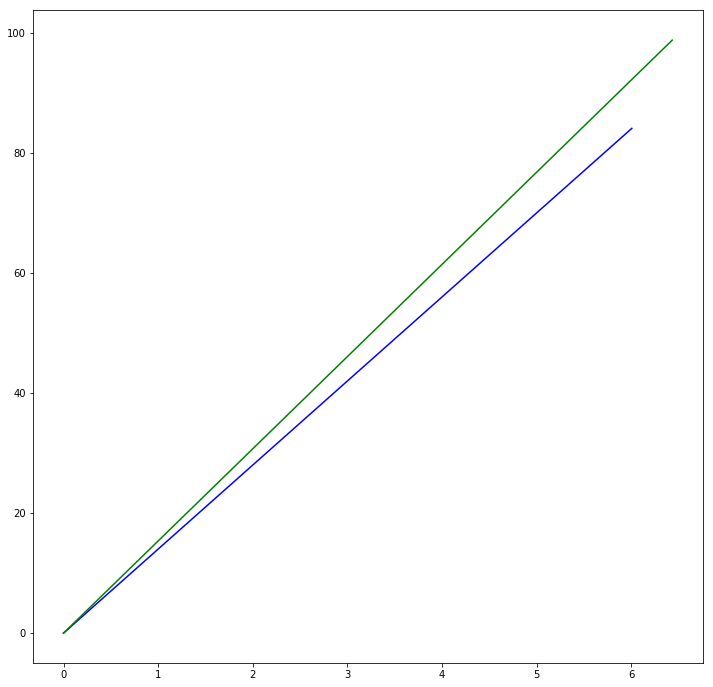

In [112]:
fig = plt.figure(figsize=(12, 12))

x1 = [0, vect1[0]]
y1 = [0, vect1[1]]
x2 = [0, vect2[0]]
y2 = [0, vect2[1]]

plt.plot(x1, y1, c='b')
plt.plot(x2, y2, c='g')

plt.show()

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

In [113]:
house1 = boston.data[121][4:7]
house2 = boston.data[128][4:7]

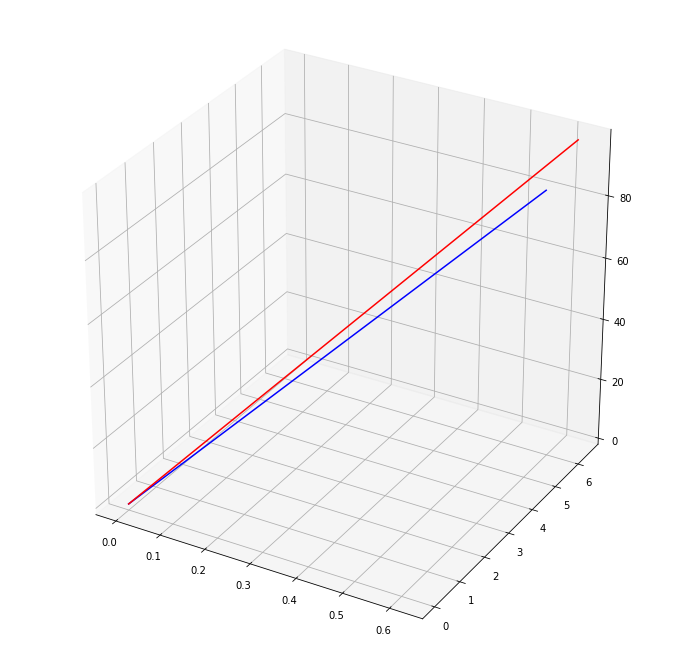

In [114]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

x = [house1[0], house2[0]]
y = [house1[1], house2[1]]
z = [house1[2], house2[2]]

ax.plot([0,x[0]], [0,y[0]], [0,z[0]], c='b')
ax.plot([0,x[1]], [0,y[1]], [0,z[1]], c='r')

plt.show()

Найти косинус угла между векторами x1 и x2, где x1 и x2 - это два дома из 2ух атрибутов, полученных на этапе 2.

In [125]:
import math
from numpy.linalg import norm

np.dot(vect1,vect2)/(norm(vect1)*norm(vect2))

0.9999803380658401

Угол очен мал, поэтому косинус близок к 1

Найти расстояние между точками x1 и x2.

In [126]:
norm(vect2-vect1)

14.706200359032245

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

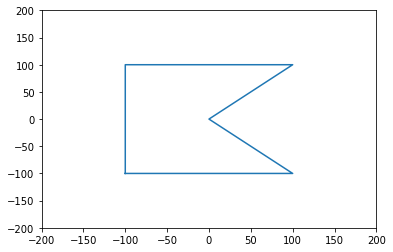

In [131]:
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Уменьшить объект в два раза.

In [132]:
C = A / 2
C

array([[-50. , -50. ,   0.5],
       [-50. ,  50. ,   0.5],
       [ 50. ,  50. ,   0.5],
       [  0. ,   0. ,   0.5],
       [ 50. , -50. ,   0.5],
       [-50. , -50. ,   0.5]])

(-200, 200)

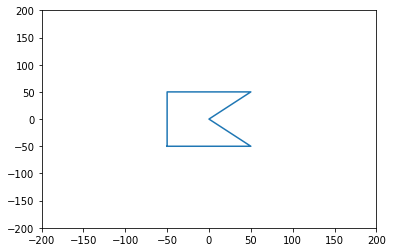

In [133]:
C = np.array(C)
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Повернуть на 130 градусов.

In [135]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

In [136]:
B = []
for point in A:
    newPoint=np.dot(TransformArray,np.transpose(point))
    B.append(newPoint)
B = np.array(B).astype(int)
B

array([[  70,  122,    1],
       [ 122,  -70,    1],
       [ -70, -122,    1],
       [   0,    0,    1],
       [-122,   70,    1],
       [  70,  122,    1]])

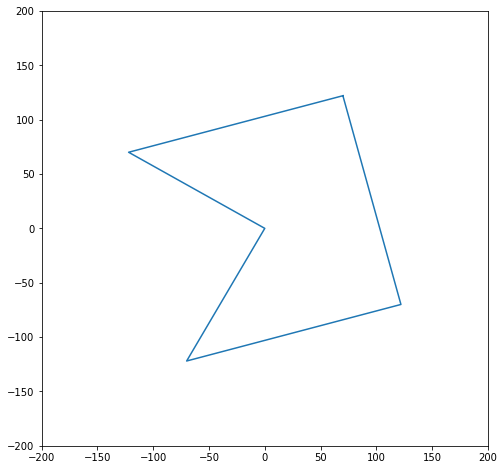

In [137]:
plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

plt.show()

Отразить объект относительно прямой y=x

In [152]:
TransformArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

B = []
for point in A:
    newPoint=np.dot(TransformArray,np.transpose(point))
    B.append(newPoint)
B = np.array(B).astype(int)
B

array([[-100, -100,    1],
       [ 100, -100,    1],
       [ 100,  100,    1],
       [   0,    0,    1],
       [-100,  100,    1],
       [-100, -100,    1]])

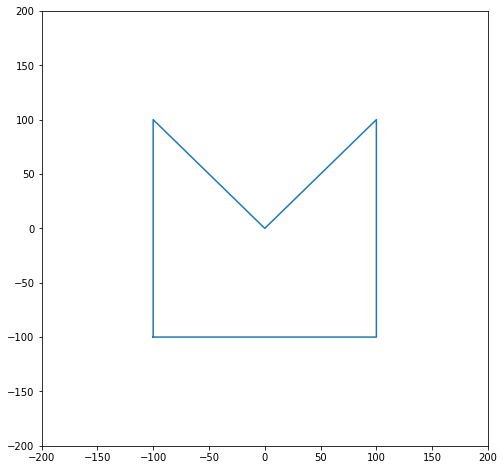

In [153]:
plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

plt.show()

Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

In [150]:
TransformArray = np.array([
    [1, 0, 200],
    [0, 1, 300],
    [0, 0, 1]
])

B = []
for point in A:
    newPoint=np.dot(TransformArray,np.transpose(point))
    B.append(newPoint)
B = np.array(B).astype(int)
B

TransformArray = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])

S = []
for point in B:
    newPoint=np.dot(TransformArray,np.transpose(point))
    S.append(newPoint)
S = np.array(S).astype(int)
S

array([[ 50, 240,   1],
       [ 50, 480,   1],
       [150, 480,   1],
       [100, 360,   1],
       [150, 240,   1],
       [ 50, 240,   1]])

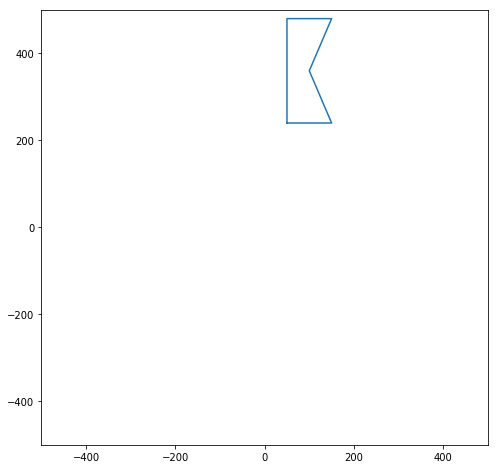

In [151]:
plt.figure(
    figsize=(8, 8),
    )
x = S[:,0]
y = S[:,1]
plt.plot(x, y)
plt.ylim([-500, 500])
plt.xlim([-500, 500])

plt.show()